In [1]:
import pandas as pd
import random 
import numpy as np
from numpy import random
from random import randint
import math
from scipy.stats import truncnorm
from matplotlib import pyplot as plt


In [2]:
# get normally distributed numbers between 300-1200

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=(300+1200)/2, sd=100, low=300, upp=1200)
s = X.rvs(5000)
randomInts = np.round(s)
randomInts

array([826., 778., 717., ..., 824., 680., 668.])

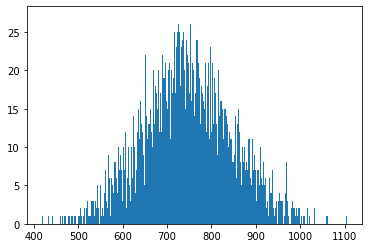

In [3]:
# check normal distribution

axis = np.arange(start=min(s), stop = max(s) + 1)
plt.hist(s, bins = axis)
plt.show()


In [4]:
#create policy table
policy_df = pd.DataFrame()                                                                                                                                                                     
indexNum = list(range(1, 5001))
policy_df["Policy_ID"] = indexNum                                                                                                                               
policy_df["Premiun"] = randomInts                                                                                                                                              
policy_df.head(5)

,Policy_ID,Premiun
0,1,826.0
1,2,778.0
2,3,717.0
3,4,558.0
4,5,905.0


In [5]:
#generate random names
import names
name = []
for i in range(5000):
    name.append(names.get_full_name())
    
name[:10]

['Lydia Townsend',
 'Edmond Pittman',
 'Sharon Reyes',
 'Jean Rogers',
 'John Mente',
 'Anthony Reisman',
 'Lynette Bell',
 'Allen Mitchell',
 'Robert Brinkmann',
 'Augustina Jaillet']

In [6]:
#normally distributed age between 18-99
age_norm = get_truncated_normal(mean=(18+99)/2, sd=10, low=18, upp=99)

#create owner table
dim_owner_df = pd.DataFrame() 
dim_owner_df["Owner_ID"] = indexNum                                                                                                                               
dim_owner_df["Name"] = name
dim_owner_df["Age"] = np.rint(age_norm.rvs(5000))
dim_owner_df["Policy_ID"] = policy_df.Policy_ID
dim_owner_df["Gender"] = np.random.choice(['F','M'], size=5000)  
dim_owner_df


,Owner_ID,Name,Age,Policy_ID,Gender
0,1,Lydia Townsend,61.0,1,F
1,2,Edmond Pittman,51.0,2,F
2,3,Sharon Reyes,53.0,3,M
3,4,Jean Rogers,53.0,4,F
4,5,John Mente,60.0,5,M
...,...,...,...,...,...
4995,4996,Patrick Coats,50.0,4996,F
4996,4997,Anne Haynes,52.0,4997,F
4997,4998,Jose Thompson,55.0,4998,F
4998,4999,Julia Donati,60.0,4999,M


In [7]:
#generate random addresses
import json

f = open("rrad/addresses-us-all.min.json",) 
data = json.loads(f.read())


In [8]:
address = []
city = []
state = []
zipcode = []
for i in range(5000):
    
    a=random.choice(data["addresses"])
    address.append(a["address1"])
    
    if "city" in a.keys():
        city.append(a["city"])
    else:
        city.append("None")
        
    state.append(a["state"])
    zipcode.append(a["postalCode"])

city[:10]

['Pasadena',
 'Dartmouth',
 'Glendale',
 'Fayetteville',
 'Glendale',
 'Medford',
 'Millersville',
 'Panama City',
 'West River',
 'Louisville']

In [9]:
len(city)

5000

In [10]:
#create location table
dim_location_df = pd.DataFrame()                                                                                                                                                                     
dim_location_df["Location_ID"] = indexNum                                                                                                                               
dim_location_df["Address"] = address
dim_location_df["City"] = city
dim_location_df["State"] = state
dim_location_df["Zip"] = zipcode
dim_location_df["Policy_ID"] = policy_df.Policy_ID
dim_location_df

,Location_ID,Address,City,State,Zip,Policy_ID
0,1,8351 Forest Drive,Pasadena,MD,21122,1
1,2,55 Russells Mills Road,Dartmouth,MA,02748,2
2,3,5912 North 48th Avenue,Glendale,AZ,85301,3
3,4,4250 North Valley Lake Drive,Fayetteville,AR,72703,4
4,5,6653 West Rose Garden Lane,Glendale,AZ,85308,5
...,...,...,...,...,...,...
4995,4996,3388 Thomasson Lane,Fairfield,CA,94534,4996
4996,4997,244 La Normandy Drive,Louisville,KY,40223,4997
4997,4998,5732 Jean Drive,Union City,CA,94587,4998
4998,4999,4632 Vermont 15,Wolcott,VT,05680,4999


In [11]:
#create time table
dim_time_df = pd.DataFrame() 
dim_time_df["Time_ID"] = indexNum                                                                                                                               
dim_time_df["Day"] = random.randint(1,31,size=5000)
dim_time_df["Month"] = random.randint(1,12,size=5000)
dim_time_df["Year"] = np.random.choice(['2019','2020'], size=5000)
dim_time_df["Policy_ID"] = policy_df.Policy_ID
dim_time_df

,Time_ID,Day,Month,Year,Policy_ID
0,1,12,3,2019,1
1,2,27,2,2019,2
2,3,10,4,2020,3
3,4,9,8,2019,4
4,5,22,2,2019,5
...,...,...,...,...,...
4995,4996,14,1,2020,4996
4996,4997,21,7,2020,4997
4997,4998,11,7,2020,4998
4998,4999,10,10,2019,4999
